UM MSBA - BGEN

# Week 10 Instructor-Led Lab: Descriptive Statistics
---
    Author: Ellery Bresler
    Course: BGEN632 Grad. Intro. to Python
    Term: Spring 2025
    Date: May 7th, 2025


## 	&#x1f4bb; California Hospitals: Data Reduction	&#x1f4bb;

I currently work in the Information Systems department for a consulting firm working with the state government agency that oversees the healthcare system in California. I am part of a team charged with assessing the condition of the healthcare system in California.

In this assignment I will practice implementing data reduction techniques in Python. I will use the data in the [`calihospital.txt` file](https://github.com/UMBGEN632/week10labs/blob/main/data/calihospital.text) provided within the `data` folder. This dataset contains responses to several surveys were emailed to a random sample of 61 hospitals.


#### Import Modules 

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

#### Set Working Directory & Accessing Data 

In [14]:
os.chdir("/Users/ElleryBresler/Documents/GitHub/week10labs/data")  # change this to your filepath

ca_hospital_data = pd.read_csv('calihospital.txt', delimiter='\t')
ca_hospital_data.to_csv('CaliforniaHospitalData_Personnel.csv', index=False)

ca_hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

## Principal Component Analysis (PCA) in Python

Open the data within Python and conduct a PCA, specifically: 

* Using the numerical columns for the hospital (7 total; not variables related to position), conduct a PCA and obtain the eigenvalues.
* Based on the eigenvalues, explain how many variables you should keep. Justify your reasoning.
* Create and display a scree plot for the same set of data.
* Based on the scree plot, how many variables should you keep? Why?

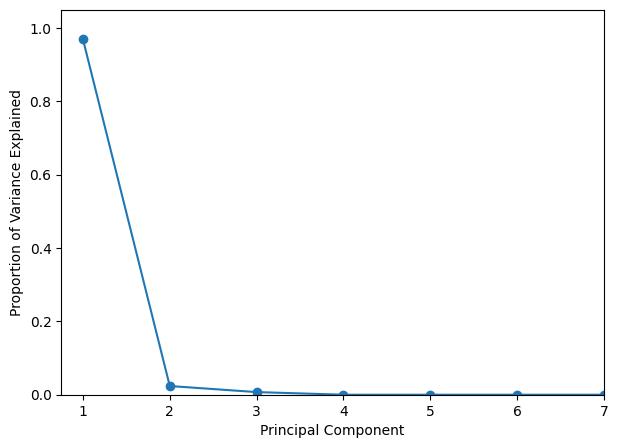

In [16]:
num_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
X = ca_hospital_data[num_cols].dropna()

# run the PCA - we specify 7 components because we have 7 variables in the DataFrame
pca_result = pca(n_components=7).fit(X)

# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

In [18]:
# obtain eigenvalues - focus on the output
pca_result.explained_variance_

# components from the PCA
#pca_result.components_.T * np.sqrt(pca_result.explained_variance_)


array([2.75753261e+17, 6.75028311e+15, 2.04591348e+15, 2.44102791e+09,
       3.37008097e+05, 6.33647054e+03, 4.13822605e-05])

In [19]:
# components from the PCA
pca_result.components_.T * np.sqrt(pca_result.explained_variance_)

array([[ 1.84843397e+03, -5.04388784e+02, -1.36520816e+02,
         2.74041013e+02,  5.80454101e+02, -1.15348763e+00,
         3.28350254e-08],
       [ 1.09490242e+06,  4.76772893e+04,  3.17740216e+04,
         4.94058718e+04, -3.21941366e+00,  8.22026752e-03,
        -1.10277058e-09],
       [ 2.79713207e+08, -3.33558913e+07, -2.48340460e+07,
        -2.41819562e+01, -6.53067648e-04, -2.01720981e-03,
        -3.21645225e-03],
       [ 1.31634759e+08, -1.28388719e+07,  3.68227223e+07,
        -4.96002192e+01,  4.86996256e-03, -1.91156443e-03,
        -3.21645225e-03],
       [ 4.24284710e+08,  2.38379497e+07,  5.15601441e+06,
        -9.55037971e+01,  4.52969416e-03,  1.92853558e-03,
         3.21645226e-03],
       [ 1.29367447e+07,  7.00327129e+07, -6.83266192e+06,
        -2.17356524e+01,  5.41597973e-03, -1.94566000e-03,
        -3.21645225e-03],
       [ 2.00049406e+02, -3.15901590e+01, -4.22488207e+01,
        -1.13109944e+00,  8.41239953e+00,  7.95935922e+01,
        -3.1484941

In [20]:
# obtain percentage of variance explained by the principal component
pca_result.explained_variance_ratio_

array([9.69087276e-01, 2.37227057e-02, 7.19001006e-03, 8.57857158e-09,
       1.18435683e-12, 2.22684328e-14, 1.45430817e-22])

It appears based on the scree plot that I should only keep 1 variable. It looks like only 1 variable has impact and the tail levels out at the second one. 

## Clustering in Python

Open the data within Python and conduct a k-means cluster analysis for the numerical data. Please conduct the following assessments:

* Choose a value of k and run your analysis. Justify your choice of k.
* Create a confusion matrix for each of the three categorical variables (e.g., `Teaching`, `TypeControl`, `DonorType`) and determine which of the three variables is the best grouping variable. Why do you think it is the best fitting?

In [52]:
ca_hospital_personel_merge.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm,StartDate
count,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62
mean,1335.768065,6.611344e+05,1.641024e+08,8.904561e+07,2.530047e+08,-1.433042e+05,194.274194,92721.467742,4.225806,2010-04-30 12:46:27.096774144
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000,23987.000000,2.000000,2002-01-01 00:00:00
25%,216.375000,7.284830e+04,1.382645e+07,1.429398e+07,2.685966e+07,-1.028922e+06,42.750000,46978.000000,3.000000,2009-04-02 06:00:00
50%,385.910000,1.670720e+05,3.184268e+07,3.259692e+07,6.153388e+07,1.464124e+06,100.500000,46978.000000,4.000000,2011-01-01 00:00:00
75%,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000,89473.000000,4.000000,2012-01-01 00:00:00
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,248904.000000,8.000000,2025-04-28 00:00:00
std,2011.856666,1.090511e+06,2.809792e+08,1.364412e+08,4.222723e+08,7.095578e+07,220.015958,83849.213062,2.099331,NaN


In [56]:
ca_hospital_personel_merge.describe(include=['category'])

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62,62,62,62,62,62
unique,62,61,61,4,2,2,24,20,2,4,25,25
top,10767,Hi-Desert Medical Center,92252,Non Profit,Small/Rural,Charity,Smith,David,F,Regional Representative,405-744-2238,akira.iwata@hsu.edu
freq,1,2,2,37,45,45,4,6,33,24,3,3


In [44]:
from sklearn.cluster import KMeans

# List of numerical columns for clustering
num_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

# Selecting only numerical columns
X = ca_hospital_data[num_cols].dropna()

# Applying KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
ca_hospital_data['cluster'] = kmeans.fit_predict(X)

In [29]:
# convert to categorical datatype
ca_hospital_data['Teaching'] = ca_hospital_data['Teaching'].astype('category')          
ca_hospital_data['TypeControl'] = ca_hospital_data['TypeControl'].astype('category')
ca_hospital_data['DonorType'] = ca_hospital_data['DonorType'].astype('category')


In [51]:
# Crosstab for Teaching (categorical)
teaching_crosstab = pd.crosstab(ca_hospital_data['Teaching'], ca_hospital_data['cluster'])
print(teaching_crosstab)

cluster       0  1  2  3
Teaching                
Small/Rural  44  0  0  0
Teaching      2  4  8  3


In [49]:
# Crosstab for TypeControl (categorical)
typecontrol_crosstab = pd.crosstab(ca_hospital_data['TypeControl'], ca_hospital_data['cluster'])
print(typecontrol_crosstab)

cluster       0  1  2  3
TypeControl             
City/County   2  1  4  0
District     14  0  0  0
Investor      3  0  0  0
Non Profit   27  3  4  3


In [50]:
# Crosstab for DonorType (categorical)
donortype_crosstab = pd.crosstab(ca_hospital_data['DonorType'], ca_hospital_data['cluster'])
print(donortype_crosstab)

cluster     0  1  2  3
DonorType             
Alumni      2  4  8  3
Charity    44  0  0  0


## Dataset Contents

This table provides the variables in the hospital data.

| Item | Definition |
|:---|:---|
| HospitalID | The primary key of each hospital |
| Name | The legal name of the hospital |
| Zip |	Zip code where the hospital is located |
| Website |	The url for the hospital’s website |
| TypeControl |	Indicates the primary managing entity of the hospital |
| Teaching |	Indicates teaching status |
| DonorType |	This field indicates the most prominent group of donors |
| NoFTE |	Number of full-time employees registered at the hospital |
| NetPatRev |	Net patient revenue |
| InOperExp |	Estimate of the inpatient operating costs |
| OutOperExp |	Estimate of the outpatient operating costs |
| OperRev |	Operating revenue of the hospital |
| OperInc |	Operating Income is the operating revenue less the operating expenses |
| AvlBeds |	The number of available beds in the hospital |
| Work_ID |	Primary key of the personnel |
| LastName |	The last name of the personnel |
| FirstName |	First name of the personnel |
| Gender |	Gender of the individual |
| PositionID |	The foreign key for the position held |
| PositionTitle |	The title of this position |
| Compensation |	The annual amount the position is compensated for service |
| MaxTerm |	The maximum number of years an individual can serve in this position |
| StartDate |	The beginning of service for this position |